In [1]:
import tensorflow as tf
import numpy as np
rng = np.random

import matplotlib.pyplot as plt
learning_rate = 0.0001
training_epochs = 1000
display_step = 50


In [2]:
with tf.name_scope("Creation_of_array"):
    x_array=np.asarray([2.0,9.4,3.32,0.88,-2.23,1.11,0.57,-2.25,-3.31,6.45])
    y_array=np.asarray([1.22,0.34,-0.08,2.25,4.41,3.09,-6.66,-9.77,0.001,2.25])
    x = tf.constant(x_array,dtype = tf.float32,name = "x_array")
    y = tf.constant(y_array,dtype = tf.float32, name= "y_array")
with tf.name_scope("Calculating_y_mean"):
    mean_y = tf.reduce_mean(y, name = "mean_y")
    with tf.Session() as sess:
        result_y = sess.run(mean_y)
        print(result_y)


-0.2949


In [3]:
with tf.name_scope("Calculating_x_mean_and_x_variance"):
    mean_x, variance = tf.nn.moments(x, [0], name = "mean_x_and_variance_x")
    with tf.Session() as sess:
        m, v = sess.run([mean_x, variance])
        print(m)
        print(v)

1.594
14.2899


In [4]:
with tf.name_scope("Calculating_covariance"):
    def tensorflow_covariance(x_array,y_array,x_mean,y_mean):
        cov = 0.0
        for i in range(0,10):
            x_val = tf.subtract(x_array[i],x_mean, name="Finding_difference_of_xval_and_mean")
            y_val = tf.subtract(y_array[i],y_mean, name="Finding_difference_of_yval_and_mean")
            total_val = tf.multiply(x_val,y_val, name="Multiplying_found_values")
            cov = tf.add(cov,total_val, name="Recursive_addition")
        return cov/10.0
    with tf.Session() as sess:
        covar = sess.run(tensorflow_covariance(x,y,m,result_y))
        print(covar)


3.83422


In [5]:
with tf.name_scope("Calculating_slope_m_and_c"):
    slope = tf.div(covar,v,name="Finding_slope")
    intm = tf.multiply(slope,m,name = "Intermediate_step")
    c_intm = tf.subtract(result_y,intm,name = "Finding_c")

    with tf.Session() as sess:
        m_slope = sess.run(slope)
        c = sess.run(c_intm)
        print(m_slope)
        print(c)

0.268316
-0.722596


Epoch: 0050 cost= 11.736242294 W= 0.93951 b= -1.4817
Epoch: 0100 cost= 11.267663956 W= 0.891134 b= -1.48306
Epoch: 0150 cost= 10.871965408 W= 0.846672 b= -1.48404
Epoch: 0200 cost= 10.537757874 W= 0.805805 b= -1.48467
Epoch: 0250 cost= 10.255441666 W= 0.768242 b= -1.485
Epoch: 0300 cost= 10.016901016 W= 0.733713 b= -1.48503
Epoch: 0350 cost= 9.815305710 W= 0.701971 b= -1.4848
Epoch: 0400 cost= 9.644878387 W= 0.672788 b= -1.48433
Epoch: 0450 cost= 9.500750542 W= 0.645957 b= -1.48364
Epoch: 0500 cost= 9.378815651 W= 0.621286 b= -1.48275
Epoch: 0550 cost= 9.275609970 W= 0.5986 b= -1.48167
Epoch: 0600 cost= 9.188205719 W= 0.577735 b= -1.48043
Epoch: 0650 cost= 9.114137650 W= 0.558546 b= -1.47904
Epoch: 0700 cost= 9.051325798 W= 0.540894 b= -1.4775
Epoch: 0750 cost= 8.998009682 W= 0.524654 b= -1.47584
Epoch: 0800 cost= 8.952714920 W= 0.509714 b= -1.47406
Epoch: 0850 cost= 8.914183617 W= 0.495965 b= -1.47217
Epoch: 0900 cost= 8.881364822 W= 0.483312 b= -1.4702
Epoch: 0950 cost= 8.853365898 W

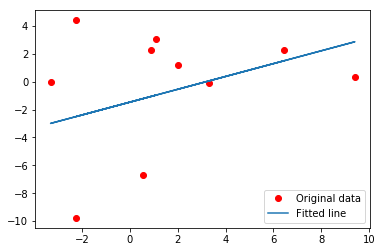

In [6]:
with tf.name_scope("Plotting"):
    n_samples = x_array.shape[0]
    X = tf.placeholder("float")
    Y = tf.placeholder("float")

    # Set model weights
    W = tf.Variable(rng.randn(), name="weight")
    b = tf.Variable(rng.randn(), name="bias")

    # Construct a linear model
    pred = tf.add(tf.multiply(X, W), b)


    # Mean squared error
    cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
    # Gradient descent
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

    # Initializing the variables
    init = tf.global_variables_initializer()

    # Launch the graph
    with tf.Session() as sess:
        sess.run(init)

        # Fit all training data
        for epoch in range(training_epochs):
            for (p, r) in zip(x_array, y_array):
                sess.run(optimizer, feed_dict={X: p, Y: r})

            # Display logs per epoch step
            if (epoch+1) % display_step == 0:
                c = sess.run(cost, feed_dict={X: x_array, Y:y_array})
                print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                    "W=", sess.run(W), "b=", sess.run(b))

        print("Optimization Finished!")
        training_cost = sess.run(cost, feed_dict={X: x_array, Y: y_array})
        print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

        # Graphic display
        plt.plot(x_array, y_array, 'ro', label='Original data')
        plt.plot(x_array, sess.run(W) * x_array + sess.run(b), label='Fitted line')
        plt.legend()
        plt.show()


In [7]:
with tf.name_scope("Finding_root_mean_square_error"):
    rms = tf.sqrt(tf.reduce_mean(tf.squared_difference(x_array, y_array,name = "Finding_squared_difference"),name="Finding_mean"),name = "Finding_square_root")
    with tf.Session() as sess:
        rmse=sess.run(rms)
        print(rmse)

5.30626913189


In [8]:
with tf.name_scope("Finding_theta_1"): 
    y_var = tf.subtract(y,result_y,name = "Subtract_y_array_with_y_mean")
    x_var = tf.subtract(x,m,name = "Subtract_x_array_with_x_mean")
    mult = tf.multiply(x_var,y_var,name = "Multiply_calculated_arrays")
    sumn = tf.reduce_sum(mult,name = "Find_sum_of_x_i_minus_mean_x_and_y_i_minus_mean_y")
    x_var2 = tf.multiply(x_var,x_var,name = "Squaring_found_arrray_values")
    sumd = tf.reduce_sum(x_var2,name = "Find_sum_of_array_of_x_i_minus_mean_x")
    val = sumn/sumd

    with tf.Session() as sess:
        res = sess.run(val)
        print(res)

0.268316


In [9]:
with tf.name_scope("Finding_theta_0"):    
    temp = tf.multiply(res,m,name = "Multiply_res_with_slope")
    theta = tf.subtract(result_y,temp,name="Sub_obtained_res_with_mean_y")
    with tf.Session() as sess:
        theta0 = sess.run(theta)
        print(theta0)

-0.722596
